<a href="https://colab.research.google.com/github/Moony-H/ML-Learning/blob/master/LogisticRegression%EA%B3%BC%EC%A0%9C1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 과제



> logistic regression을 사용
 
> 테이블 데이터를 pandas data frrame 으로 변환

> 데이터 셋을 학습데이터와 테스트 데이터로 분류

> 주어진 소스 프로그램을 수정하여 학습 모델을 완성

> Mathplot 라이브러리를 사용하여  Cost 변화를 그래프로 작성

> 프로그램이 실행된 학번,ipynb 파일을 eclass로 제출




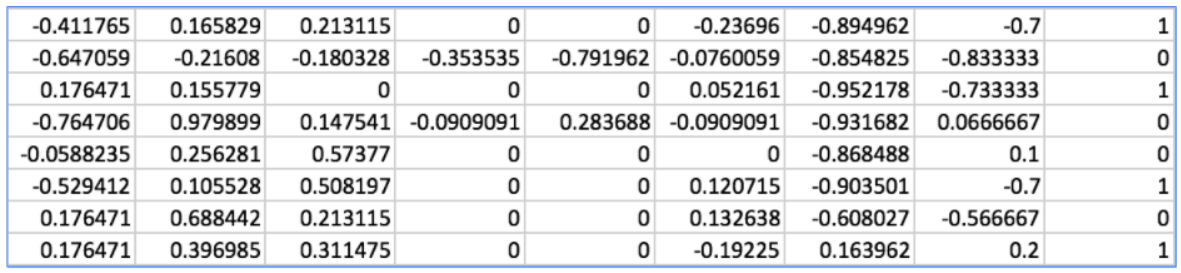
  






In [ ]:
!pip install tensorflow==1.0

     |████████████████████████████████| 44.5MB 96kB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


0 1.0578583
3000 0.15790476
6000 0.08510787
9000 0.057463467
12000 0.04316377
15000 0.034485433
18000 0.028678125
21000 0.02452735
24000 0.021416396
27000 0.018999934
30000 0.017069776


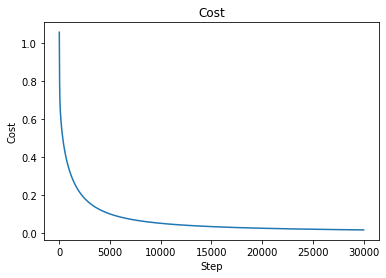

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#결과 값을 y_data에 넣어야 하기 때문에 Y도 넣어야 함.

candidates = {'X1': [-0.411765,-0.647059,0.176471,-0.764706,-0.0588235,-0.529412,0.176471],
              'X2': [0.165829,-0.21608,0.155779,0.979899,0.256281,0.105528,0.688442],
              'X3': [0.213115,-0.180328,0,0.147541,0.57377,0.508197,0.213115],
              'X4': [0,-0.353535,0,-0.0909091,0,0,0],
              'X5': [0,-0.791962,0,0.283688,0,0,0],
              'X6': [-0.23696,-0.0760059,0.052161,-0.0909091,0,0.120715,0.132638],
              'X7': [-0.894962,-0.854825,-0.952178,-0.931682,-0.868488,-0.903501,-00.608027],
              'X8': [-0.7,-0.833333,-0.733333,0.0666667,0.1,-0.7,-0.566667],
              'Y':[1,0,1,0,0,1,0]
              }


df = pd.DataFrame(candidates)
#확인할 값
x_test = [[0.176471, 0.396985, 0.311475, 0, 0, -0.19225, 0.163962, 0.2]]

# X1 ~ X8 까지의 값 추출.
x_data = df.iloc[:,:8].values.tolist()



#y 데이터(결과값) 추출
y_data = df.iloc[:,-1].values.tolist()
y_data

y_number = len(y_data)
y_data =[]


for index in range(y_number):
  nData = df.iloc[index:index+1,-1].values
  y_data.append(nData.tolist())
y_data
X = tf.placeholder(tf.float32, shape=[None, len(x_data[0])])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([len(x_data[0]), 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y)*tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

costValue=[]
stepValue=[]
# Launch graph
with tf.Session() as sess:


   # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())

  for step in range(30001):
    
    cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    stepValue.append(step)
    costValue.append(cost_val)
    if step % 3000 == 0:
      print(step, cost_val)
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})

  

   # 여기에 그래프 코드 추가 - X축은 반복 횟수, Y축은 Cost
  plt.plot(stepValue,costValue)
  plt.xlabel('Step')
  plt.ylabel('Cost')
  plt.title('Cost')

